<a href="https://colab.research.google.com/github/srkwon/analysis/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B1%B0%EB%9E%98%EC%86%8C_%ED%81%AC%EB%A1%A4%EB%A7%81_%EC%BD%94%EB%93%9C_%EA%B5%AC%EC%84%B1_20250629_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BeautifulSoup Í∏∞Î∞ò ÌÅ¨Î°§ÎßÅ


In [10]:
import requests
from bs4 import BeautifulSoup
import time

base_url = "https://kdx.kr"

start_url = "https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002"

print(f"Î¶¨Ïä§Ìä∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: {start_url}")
res = requests.get(start_url)
if res.status_code != 200:
    print("‚ùå Î¶¨Ïä§Ìä∏ ÌéòÏù¥ÏßÄ Î°úÎìú Ïã§Ìå®")
    exit()

soup = BeautifulSoup(res.text, "html.parser")

# ‚úÖ BeautifulSoupÎäî ÎπÑÌëúÏ§Ä Íµ¨Ï°∞Î•º ÍµêÏ†ï ‚Üí li ÏïàÏóê aÍ∞Ä Îì§Ïñ¥Í∞ÄÍ≤å Îê®
list_items = soup.select("ul.card-list li.list-item")

print(f"‚úÖ Î¶¨Ïä§Ìä∏ ÏïÑÏù¥ÌÖú Í∞úÏàò: {len(list_items)}")

links = []

for li in list_items:
    a_tag = li.find("a", href=True)
    if a_tag:
        href = a_tag["href"]
        links.append(href)
        print(base_url + href)

print(f"\n‚úÖ ÏµúÏ¢Ö Ï∂îÏ∂úÎêú ÎßÅÌÅ¨ Í∞úÏàò: {len(links)}")


data_list = []

for idx, li in enumerate(items, start=1):
    # liÏùò Î∂ÄÎ™® <a> ÌÉúÍ∑∏ ÌÉêÏÉâ
    parent_a = li.find_parent("a")
    if not parent_a or not parent_a.get("href"):
        print(f"‚ö†Ô∏è [{idx}] ÎßÅÌÅ¨ ÏóÜÏùå, Í±¥ÎÑàÎúÄ")
        continue

    href = parent_a.get("href")
    detail_url = base_url + href
    print(f"\n--- [{idx}] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: {detail_url}")

    detail_res = requests.get(detail_url)
    if detail_res.status_code != 200:
        print(f"‚ùå [{idx}] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Î°úÎìú Ïã§Ìå®: {detail_url}")
        continue

    detail_soup = BeautifulSoup(detail_res.text, "html.parser")

    # Ï¥ù Íµ¨Îß§Í∏àÏï°
    purchase_elem = detail_soup.select_one("#dataView > div.container > div.detail-wrap > div.item-right > div.purchaseIs > p")
    if purchase_elem:
        purchase_amount = purchase_elem.get_text(strip=True)
        print(f"üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°: {purchase_amount}")
    else:
        purchase_amount = "N/A"
        print("‚ö†Ô∏è Ï¥ù Íµ¨Îß§Í∏àÏï° Ï†ïÎ≥¥ ÏóÜÏùå")

    # Ïä§ÌÇ§Îßà(ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÌÖåÏù¥Î∏î)
    schema_table = detail_soup.select_one("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > div.table-wrap.preview_wrap.expand > div.sample_data > table")
    if schema_table:
        schema_text = schema_table.get_text(separator=" | ", strip=True)
        print(f"üìÑ Ïä§ÌÇ§Îßà(ÏÉòÌîå Îç∞Ïù¥ÌÑ∞) ÏöîÏïΩ: {schema_text[:100]}...")
    else:
        schema_text = "N/A"
        print("‚ö†Ô∏è Ïä§ÌÇ§Îßà Ï†ïÎ≥¥ ÏóÜÏùå")

    # Í≤∞Í≥º Ï†ÄÏû•
    data_list.append({
        "url": detail_url,
        "purchase_amount": purchase_amount,
        "schema": schema_text,
    })

    time.sleep(1)

print("\n‚úÖ Ï†ÑÏ≤¥ ÌÅ¨Î°§ÎßÅ ÏôÑÎ£å")
print(f"Ï¥ù ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞ Ïàò: {len(data_list)}")
for d in data_list[:3]:
    print("\nüìù ÏòàÏãú Îç∞Ïù¥ÌÑ∞")
    print(d)


Î¶¨Ïä§Ìä∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002
‚úÖ Î¶¨Ïä§Ìä∏ ÏïÑÏù¥ÌÖú Í∞úÏàò: 0

‚úÖ ÏµúÏ¢Ö Ï∂îÏ∂úÎêú ÎßÅÌÅ¨ Í∞úÏàò: 0

‚úÖ Ï†ÑÏ≤¥ ÌÅ¨Î°§ÎßÅ ÏôÑÎ£å
Ï¥ù ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞ Ïàò: 0


# Selenium Í∏∞Î∞ò ÌÅ¨Î°§ÎßÅ

In [8]:
!apt-get update
!apt install -y wget unzip curl

# ÌÅ¨Î°¨ ÏÑ§Ïπò
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb || apt-get -fy install

# ÌÅ¨Î°¨ Î≤ÑÏ†Ñ ÌôïÏù∏
!google-chrome --version

# ÌÅ¨Î°¨ Î≤ÑÏ†ÑÏóê ÎßûÎäî ÎìúÎùºÏù¥Î≤Ñ Î≤ÑÏ†Ñ Í∞ÄÏ†∏Ïò§Í∏∞
!CHROME_VERSION=$(google-chrome --version | cut -d ' ' -f 3 | cut -d '.' -f 1) \
 && echo "Using Chrome major version: $CHROME_VERSION" \
 && DRIVER_VERSION=$(curl -sS "https://chromedriver.storage.googleapis.com/LATEST_RELEASE_${CHROME_VERSION}") \
 && echo "Matching chromedriver version: $DRIVER_VERSION" \
 && wget -O /tmp/chromedriver.zip "https://chromedriver.storage.googleapis.com/${DRIVER_VERSION}/chromedriver_linux64.zip" \
 && unzip /tmp/chromedriver.zip chromedriver -d /usr/bin/

!chmod +x /usr/bin/chromedriver
!pip install selenium


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Get:2 https://dl.google.com/linux/chrome/deb stable InRelease [1,825 B]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:11 https://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1,212 B]
Hit:12 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Fetched 3,037 B in 2s (1,366 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repos

In [9]:
# üåü ÏÖÄ 2: ÌÅ¨Î°§ÎßÅ ÏΩîÎìú

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

# URL ÏÑ§Ï†ï
base_url = "https://kdx.kr"
start_url = "https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002"

# ÏòµÏÖò ÏÑ§Ï†ï
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--remote-debugging-port=9222")
chrome_options.binary_location = "/usr/bin/google-chrome"

# ÎìúÎùºÏù¥Î≤Ñ Í≤ΩÎ°ú ÏÑ§Ï†ï
service = Service("/usr/bin/chromedriver")

# ÎìúÎùºÏù¥Î≤Ñ Ï¥àÍ∏∞Ìôî
driver = webdriver.Chrome(service=service, options=chrome_options)

print(f"Ï†ëÍ∑º: {start_url}")
driver.get(start_url)
time.sleep(2)

# ÏÉÅÌíà ÎßÅÌÅ¨ Ï∂îÏ∂ú
a_tags = driver.find_elements(By.CSS_SELECTOR, "ul.card-list > a")
print(f"ÏÑ∏Î∂Ä ÎßÅÌÅ¨ Í∞úÏàò: {len(a_tags)}")

links = []

for idx, a in enumerate(a_tags, start=1):
    href = a.get_attribute("href")
    if href:
        full_url = base_url + href
        print(f"[{idx}] {full_url}")
        links.append(full_url)

# Ï≤´ Î≤àÏß∏ ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ ÏòàÏ†ú Ï†ëÍ∑º
if links:
    driver.get(links[0])
    time.sleep(1.5)

    try:
        purchase_elem = driver.find_element(By.CSS_SELECTOR, "#dataView > div.container > div.detail-wrap > div.item-right > div.purchaseIs > p")
        purchase_amount = purchase_elem.text.strip()
        print(f"\nüí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°: {purchase_amount}")
    except:
        print("‚ö†Ô∏è Ï¥ù Íµ¨Îß§Í∏àÏï° Ï†ïÎ≥¥ ÏóÜÏùå")

    try:
        schema_elem = driver.find_element(By.CSS_SELECTOR, "#dataView > div.container > div.detail-wrap > div.item-left > div.inner > div.table-wrap.preview_wrap.expand > div.sample_data > table")
        schema_text = schema_elem.text.strip()
        print(f"üìÑ Ïä§ÌÇ§Îßà ÏöîÏïΩ: {schema_text[:100]}...")
    except:
        print("‚ö†Ô∏è Ïä§ÌÇ§Îßà Ï†ïÎ≥¥ ÏóÜÏùå")

driver.quit()
print("\n‚úÖ Selenium ÌÅ¨Î°§ÎßÅ ÏôÑÎ£å")


WebDriverException: Message: Service /usr/bin/chromedriver unexpectedly exited. Status code was: 1


# Playwright Í∏∞Î∞ò ÌÅ¨Î°§ÎßÅ

In [10]:
!pip install playwright
!playwright install


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45.8/45.8 MB 21.1 MB/s eta 0:00:00
171.6 MiB [] 0% 0.0s171.6 MiB [] 0% 94.9s171.6 MiB [] 0% 108.1s171.6 MiB [] 0% 71.3s171.6 MiB [] 0% 52.9s171.6 MiB [] 0% 40.6s171.6 MiB [] 0% 31.2s171.6 MiB [] 0% 22.2s171.6 MiB [] 0% 16.0s171.6 MiB [] 1% 11.4s171.6 MiB [] 2% 8.4s171.6 MiB [] 2% 7.0s171.6 MiB [] 3% 6.3s171.6 MiB [] 3% 5.9s171.6 MiB [] 4% 5.5s171.6 MiB [] 4% 5.6s171.6 MiB [] 5% 5.1s171.6 MiB [] 5% 5.5s171.6 MiB [] 6% 4.9s171.6 MiB [] 6% 4.7s171.6 MiB [] 7% 4.4s171.6 MiB [] 7% 4.3s171.6 MiB [] 8% 4.2s171.6 MiB [] 9% 4.0s171.6 MiB [] 10% 3.7s171.6 MiB [] 11% 3.6s171.6 MiB [] 12% 3.4s171.6 MiB [] 13% 3.2s171.6 MiB [] 14% 3.0s171.6 MiB [] 15% 2.9s171.6 MiB [] 16% 2.9s171.6 MiB [] 16% 2.8s171.6 MiB [] 17% 2.7s171.6 MiB [] 18% 2.6s171.6 MiB [] 19% 2.5s171.6 MiB [] 21% 2.4s171.6 MiB [] 21% 2.3s171.6 MiB [] 21% 2.4s171.6 MiB [] 22% 2.4s171.6 MiB [] 23% 2.3s171.6 MiB [] 24

In [12]:
import asyncio
from playwright.async_api import async_playwright

base_url = "https://kdx.kr"
start_url = "https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002"

async def run():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        print(f"Ï†ëÍ∑º: {start_url}")
        await page.goto(start_url)
        await page.wait_for_timeout(3000)  # 3Ï¥à ÎåÄÍ∏∞

        a_tags = await page.query_selector_all("ul.card-list > a")
        print(f"ÏÑ∏Î∂Ä ÎßÅÌÅ¨ Í∞úÏàò: {len(a_tags)}")

        links = []
        for idx, a in enumerate(a_tags, start=1):
            href = await a.get_attribute("href")
            if href:
                full_url = base_url + href
                print(f"[{idx}] {full_url}")
                links.append(full_url)

        # Ï≤´ Î≤àÏß∏ ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ ÏòàÏ†ú
        if links:
            await page.goto(links[0])
            await page.wait_for_timeout(3000)

            try:
                purchase_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-right > div.purchaseIs > p")
                purchase_amount = await purchase_elem.inner_text()
                print(f"\nüí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°: {purchase_amount.strip()}")
            except:
                print("‚ö†Ô∏è Ï¥ù Íµ¨Îß§Í∏àÏï° Ï†ïÎ≥¥ ÏóÜÏùå")

            try:
                schema_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > div.table-wrap.preview_wrap.expand > div.sample_data > table")
                schema_text = await schema_elem.inner_text()
                print(f"üìÑ Ïä§ÌÇ§Îßà ÏöîÏïΩ: {schema_text.strip()[:100]}...")
            except:
                print("‚ö†Ô∏è Ïä§ÌÇ§Îßà Ï†ïÎ≥¥ ÏóÜÏùå")

        await browser.close()
        print("\n‚úÖ Playwright ÌÅ¨Î°§ÎßÅ ÏôÑÎ£å")

# ÏΩîÎû© ÌôòÍ≤ΩÏóêÏÑú asyncio Î£®ÌîÑ ÎèåÎ¶¨Í∏∞
await run()


Ï†ëÍ∑º: https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002
ÏÑ∏Î∂Ä ÎßÅÌÅ¨ Í∞úÏàò: 4
[1] https://kdx.kr/data/view/41601
[2] https://kdx.kr/data/view/41600
[3] https://kdx.kr/data/view/41599
[4] https://kdx.kr/data/view/41475

üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°: 22,000,000Ïõê
‚ö†Ô∏è Ïä§ÌÇ§Îßà Ï†ïÎ≥¥ ÏóÜÏùå

‚úÖ Playwright ÌÅ¨Î°§ÎßÅ ÏôÑÎ£å


In [15]:
import asyncio
from playwright.async_api import async_playwright

base_url = "https://kdx.kr"
start_url = "https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002"

async def run():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        print(f"Ï†ëÍ∑º: {start_url}")
        await page.goto(start_url)
        await page.wait_for_timeout(3000)

        a_tags = await page.query_selector_all("ul.card-list > a")
        print(f"ÏÑ∏Î∂Ä ÎßÅÌÅ¨ Í∞úÏàò: {len(a_tags)}")

        links = []
        for idx, a in enumerate(a_tags, start=1):
            href = await a.get_attribute("href")
            if href:
                full_url = base_url + href
                print(f"[{idx}] {full_url}")
                links.append(full_url)

        # ‚úÖ Í∞Å ÏÑ∏Î∂Ä ÌéòÏù¥ÏßÄ Î∞òÎ≥µ
        for detail_idx, detail_url in enumerate(links, start=1):
            print(f"\n--- [{detail_idx}] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: {detail_url}")
            await page.goto(detail_url)
            await page.wait_for_timeout(2000)

            # Ï¥ù Íµ¨Îß§Í∏àÏï°
            try:
                purchase_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-right > div.purchaseIs > p")
                purchase_amount = await purchase_elem.inner_text()
                print(f"üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°: {purchase_amount.strip()}")
            except:
                purchase_amount = "N/A"
                print("‚ö†Ô∏è Ï¥ù Íµ¨Îß§Í∏àÏï° Ï†ïÎ≥¥ ÏóÜÏùå")

            # Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà Ïª¨Îüº Ï∂îÏ∂ú
            try:
                th_elements = await page.query_selector_all("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > div.table-wrap.preview_wrap > div.sample_data > table > thead > tr > th")
                schema_columns = []
                for th in th_elements:
                    text = await th.inner_text()
                    schema_columns.append(text.strip())

                schema_text_clean = " | ".join(schema_columns)
                print(f"üìÑ Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà(Ïª¨Îüº): {schema_text_clean}")
            except:
                schema_text_clean = "N/A"
                print("‚ö†Ô∏è Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà Ï†ïÎ≥¥ ÏóÜÏùå")

        await browser.close()
        print("\n‚úÖ Playwright ÌÅ¨Î°§ÎßÅ ÏôÑÎ£å")

await run()


Ï†ëÍ∑º: https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002
ÏÑ∏Î∂Ä ÎßÅÌÅ¨ Í∞úÏàò: 4
[1] https://kdx.kr/data/view/41601
[2] https://kdx.kr/data/view/41600
[3] https://kdx.kr/data/view/41599
[4] https://kdx.kr/data/view/41475

--- [1] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: https://kdx.kr/data/view/41601
üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°: 22,000,000Ïõê
üìÑ Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà(Ïª¨Îüº): STD_YM | BLCK_SP_CD | CTPV_CD | CTPV_NM | CTGG_CD | CTGG_NM | ADSTRD_CD | ADSTRD_NM | SEXD_CD | AGGRD_CD | JOBG_CD | TOT_ASST_AMT | NET_ASST_AMT

--- [2] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: https://kdx.kr/data/view/41600
üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°: 17,600,000Ïõê
üìÑ Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà(Ïª¨Îüº): STD_YM | BLCK_SP_CD | CTPV_CD | CTPV_NM | CTGG_CD | CTGG_NM | SEXD_CD | AGGRD_CD | JOBG_CD | TOT_ASST_AMT | NET_ASST_AMT

--- [3] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: https://kdx.kr/data/view/41599
‚ö†Ô∏è Ï¥ù Íµ¨Îß§Í∏àÏï° Ï†ïÎ≥¥ ÏóÜÏùå
üìÑ Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà(Ïª¨Îüº): STD_YM | BLCK_SP_CD | CTPV_CD | CTPV_NM | TOT_ASST_AMT | NET

In [16]:
import asyncio
import json
import re
from playwright.async_api import async_playwright

base_url = "https://kdx.kr"
start_url = "https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002"

async def run():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        print(f"Ï†ëÍ∑º: {start_url}")
        await page.goto(start_url)
        await page.wait_for_timeout(3000)

        a_tags = await page.query_selector_all("ul.card-list > a")
        print(f"ÏÑ∏Î∂Ä ÎßÅÌÅ¨ Í∞úÏàò: {len(a_tags)}")

        links = []
        for idx, a in enumerate(a_tags, start=1):
            href = await a.get_attribute("href")
            if href:
                full_url = base_url + href
                print(f"[{idx}] {full_url}")
                links.append(full_url)

        # ÌååÏùº Ï§ÄÎπÑ
        output_file = "output.jsonl"
        with open(output_file, "w", encoding="utf-8") as f:
            # Í∞Å ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º
            for detail_idx, detail_url in enumerate(links, start=1):
                print(f"\n--- [{detail_idx}] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: {detail_url}")
                await page.goto(detail_url)
                await page.wait_for_timeout(2000)

                # Ï¥ù Íµ¨Îß§Í∏àÏï°
                try:
                    purchase_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-right > div.purchaseIs > p")
                    purchase_text = await purchase_elem.inner_text()
                    # Î¨∏ÏûêÏó¥ÏóêÏÑú Ïà´Ïûê Ï∂îÏ∂ú
                    price_num = int(re.sub(r"[^\d]", "", purchase_text))
                    print(f"üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°(Ïà´Ïûê): {price_num}")
                except:
                    price_num = 0
                    print("‚ö†Ô∏è Ï¥ù Íµ¨Îß§Í∏àÏï° Ï†ïÎ≥¥ ÏóÜÏùå, 0 Ï≤òÎ¶¨")

                # Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà Ïª¨Îüº Ï∂îÏ∂ú
                try:
                    th_elements = await page.query_selector_all("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > div.table-wrap.preview_wrap > div.sample_data > table > thead > tr > th")
                    schema_columns = []
                    for th in th_elements:
                        text = await th.inner_text()
                        schema_columns.append(text.strip())
                    print(f"üìÑ Ïª¨Îüº: {schema_columns}")
                except:
                    schema_columns = []
                    print("‚ö†Ô∏è Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà Ï†ïÎ≥¥ ÏóÜÏùå, Îπà Î¶¨Ïä§Ìä∏ Ï≤òÎ¶¨")

                # JSON Í∞ùÏ≤¥ ÏÉùÏÑ±
                data = {
                    "columns": schema_columns,
                    "price": price_num
                }

                # ÌååÏùºÏóê Ìïú Ï§ÑÏî© Í∏∞Î°ù
                f.write(json.dumps(data, ensure_ascii=False) + "\n")

        await browser.close()
        print(f"\n‚úÖ ÌÅ¨Î°§ÎßÅ Î∞è ÌååÏùº ÏûëÏÑ± ÏôÑÎ£å! ‚ûú {output_file}")

await run()


Ï†ëÍ∑º: https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002
ÏÑ∏Î∂Ä ÎßÅÌÅ¨ Í∞úÏàò: 4
[1] https://kdx.kr/data/view/41601
[2] https://kdx.kr/data/view/41600
[3] https://kdx.kr/data/view/41599
[4] https://kdx.kr/data/view/41475

--- [1] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: https://kdx.kr/data/view/41601
üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°(Ïà´Ïûê): 22000000
üìÑ Ïª¨Îüº: ['STD_YM', 'BLCK_SP_CD', 'CTPV_CD', 'CTPV_NM', 'CTGG_CD', 'CTGG_NM', 'ADSTRD_CD', 'ADSTRD_NM', 'SEXD_CD', 'AGGRD_CD', 'JOBG_CD', 'TOT_ASST_AMT', 'NET_ASST_AMT']

--- [2] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: https://kdx.kr/data/view/41600
üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°(Ïà´Ïûê): 17600000
üìÑ Ïª¨Îüº: ['STD_YM', 'BLCK_SP_CD', 'CTPV_CD', 'CTPV_NM', 'CTGG_CD', 'CTGG_NM', 'SEXD_CD', 'AGGRD_CD', 'JOBG_CD', 'TOT_ASST_AMT', 'NET_ASST_AMT']

--- [3] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: https://kdx.kr/data/view/41599
‚ö†Ô∏è Ï¥ù Íµ¨Îß§Í∏àÏï° Ï†ïÎ≥¥ ÏóÜÏùå, 0 Ï≤òÎ¶¨
üìÑ Ïª¨Îüº: ['STD_YM', 'BLCK_SP_CD', 'CTPV_CD', 'CTPV_NM', 'TOT_ASST_AMT', 'NET_ASST_AMT'

In [17]:
import asyncio
import json
import re
from playwright.async_api import async_playwright

base_url = "https://kdx.kr"
start_url = "https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002"

async def run():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        print(f"Ï†ëÍ∑º: {start_url}")
        await page.goto(start_url)
        await page.wait_for_timeout(3000)

        a_tags = await page.query_selector_all("ul.card-list > a")
        print(f"ÏÑ∏Î∂Ä ÎßÅÌÅ¨ Í∞úÏàò: {len(a_tags)}")

        links = []
        for idx, a in enumerate(a_tags, start=1):
            href = await a.get_attribute("href")
            if href:
                full_url = base_url + href
                print(f"[{idx}] {full_url}")
                links.append(full_url)

        output_file = "output.jsonl"
        with open(output_file, "w", encoding="utf-8") as f:
            for detail_idx, detail_url in enumerate(links, start=1):
                print(f"\n--- [{detail_idx}] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: {detail_url}")
                await page.goto(detail_url)
                await page.wait_for_timeout(2000)

                # Ï¥ù Íµ¨Îß§Í∏àÏï°
                try:
                    purchase_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-right > div.purchaseIs > p")
                    purchase_text = await purchase_elem.inner_text()
                    price_num = int(re.sub(r"[^\d]", "", purchase_text))
                    print(f"üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°(Ïà´Ïûê): {price_num}")
                except:
                    price_num = 0
                    print("‚ö†Ô∏è Ï¥ù Íµ¨Îß§Í∏àÏï° Ï†ïÎ≥¥ ÏóÜÏùå, 0 Ï≤òÎ¶¨")

                # Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà Ïª¨Îüº Ï∂îÏ∂ú
                try:
                    th_elements = await page.query_selector_all("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > div.table-wrap.preview_wrap > div.sample_data > table > thead > tr > th")
                    schema_columns = []
                    for th in th_elements:
                        text = await th.inner_text()
                        schema_columns.append(text.strip())
                    print(f"üìÑ Ïª¨Îüº: {schema_columns}")
                except:
                    schema_columns = []
                    print("‚ö†Ô∏è Îç∞Ïù¥ÌÑ∞ Ïä§ÌÇ§Îßà Ï†ïÎ≥¥ ÏóÜÏùå, Îπà Î¶¨Ïä§Ìä∏ Ï≤òÎ¶¨")

                # ÏÉÅÌíàÎ™Ö
                try:
                    name_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(2) > td")
                    name_text = await name_elem.inner_text()
                except:
                    name_text = "N/A"

                # Ïπ¥ÌÖåÍ≥†Î¶¨
                try:
                    category_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(1) > td")
                    category_text = await category_elem.inner_text()
                except:
                    category_text = "N/A"

                # Îç∞Ïù¥ÌÑ∞ Ìè¨Îß∑
                try:
                    format_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(6) > td")
                    format_text = await format_elem.inner_text()
                except:
                    format_text = "N/A"

                # Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ï¶à
                try:
                    size_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(7) > td")
                    size_text = await size_elem.inner_text()
                except:
                    size_text = "N/A"

                # JSON Í∞ùÏ≤¥ Íµ¨ÏÑ±
                data = {
                    "columns": schema_columns,
                    "price": price_num,
                    "name": name_text.strip(),
                    "category": category_text.strip(),
                    "format": format_text.strip(),
                    "size": size_text.strip()
                }

                # ÌååÏùºÏóê Í∏∞Î°ù
                f.write(json.dumps(data, ensure_ascii=False) + "\n")

        await browser.close()
        print(f"\n‚úÖ ÌÅ¨Î°§ÎßÅ Î∞è ÌååÏùº ÏûëÏÑ± ÏôÑÎ£å! ‚ûú {output_file}")

await run()


Ï†ëÍ∑º: https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002
ÏÑ∏Î∂Ä ÎßÅÌÅ¨ Í∞úÏàò: 4
[1] https://kdx.kr/data/view/41601
[2] https://kdx.kr/data/view/41600
[3] https://kdx.kr/data/view/41599
[4] https://kdx.kr/data/view/41475

--- [1] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: https://kdx.kr/data/view/41601
üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°(Ïà´Ïûê): 22000000
üìÑ Ïª¨Îüº: ['STD_YM', 'BLCK_SP_CD', 'CTPV_CD', 'CTPV_NM', 'CTGG_CD', 'CTGG_NM', 'ADSTRD_CD', 'ADSTRD_NM', 'SEXD_CD', 'AGGRD_CD', 'JOBG_CD', 'TOT_ASST_AMT', 'NET_ASST_AMT']

--- [2] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: https://kdx.kr/data/view/41600
üí∞ Ï¥ù Íµ¨Îß§Í∏àÏï°(Ïà´Ïûê): 17600000
üìÑ Ïª¨Îüº: ['STD_YM', 'BLCK_SP_CD', 'CTPV_CD', 'CTPV_NM', 'CTGG_CD', 'CTGG_NM', 'SEXD_CD', 'AGGRD_CD', 'JOBG_CD', 'TOT_ASST_AMT', 'NET_ASST_AMT']

--- [3] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ï†ëÍ∑º: https://kdx.kr/data/view/41599
‚ö†Ô∏è Ï¥ù Íµ¨Îß§Í∏àÏï° Ï†ïÎ≥¥ ÏóÜÏùå, 0 Ï≤òÎ¶¨
üìÑ Ïª¨Îüº: ['STD_YM', 'BLCK_SP_CD', 'CTPV_CD', 'CTPV_NM', 'TOT_ASST_AMT', 'NET_ASST_AMT'

In [18]:
import asyncio
import json
import re
from playwright.async_api import async_playwright

base_url = "https://kdx.kr"
start_url = "https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002"

async def run():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()
        await page.goto(start_url)
        await page.wait_for_timeout(3000)

        output_file = "output.jsonl"
        with open(output_file, "w", encoding="utf-8") as f:

            # ÌéòÏù¥ÏßÄÎÑ§Ïù¥ÏÖò Î≤ÑÌäº Ï†ÑÏ≤¥ Í∞ÄÏ†∏Ïò§Í∏∞
            page_buttons = await page.query_selector_all("#pagination > a.tui-page-btn")
            total_pages = len(page_buttons)
            print(f"Ï¥ù ÌéòÏù¥ÏßÄ Í∞úÏàò: {total_pages}")

            # ÌéòÏù¥ÏßÄ ÏàúÌöå
            for page_idx in range(1, total_pages + 1):
                print(f"\n‚úÖ [ÌéòÏù¥ÏßÄ {page_idx}] ÏàòÏßë ÏãúÏûë")
                await page.wait_for_timeout(2000)

                a_tags = await page.query_selector_all("ul.card-list > a")
                print(f"ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò: {len(a_tags)}")

                links = []
                for a in a_tags:
                    href = await a.get_attribute("href")
                    if href:
                        full_url = base_url + href
                        links.append(full_url)

                for detail_idx, detail_url in enumerate(links, start=1):
                    print(f"\n--- [ÌéòÏù¥ÏßÄ {page_idx}, ÏÉÅÌíà {detail_idx}] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: {detail_url}")
                    await page.goto(detail_url)
                    await page.wait_for_timeout(1500)

                    try:
                        purchase_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-right > div.purchaseIs > p")
                        purchase_text = await purchase_elem.inner_text()
                        price_num = int(re.sub(r"[^\d]", "", purchase_text))
                    except:
                        price_num = 0

                    try:
                        th_elements = await page.query_selector_all("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > div.table-wrap.preview_wrap > div.sample_data > table > thead > tr > th")
                        schema_columns = [await th.inner_text() for th in th_elements]
                        schema_columns = [col.strip() for col in schema_columns]
                    except:
                        schema_columns = []

                    try:
                        name_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(2) > td")
                        name_text = await name_elem.inner_text()
                    except:
                        name_text = "N/A"

                    try:
                        category_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(1) > td")
                        category_text = await category_elem.inner_text()
                    except:
                        category_text = "N/A"

                    try:
                        format_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(6) > td")
                        format_text = await format_elem.inner_text()
                    except:
                        format_text = "N/A"

                    try:
                        size_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(7) > td")
                        size_text = await size_elem.inner_text()
                    except:
                        size_text = "N/A"

                    data = {
                        "columns": schema_columns,
                        "price": price_num,
                        "name": name_text.strip(),
                        "category": category_text.strip(),
                        "format": format_text.strip(),
                        "size": size_text.strip()
                    }

                    f.write(json.dumps(data, ensure_ascii=False) + "\n")

                    await page.goto(start_url)
                    await page.wait_for_timeout(1500)

                # Îã§Ïùå ÌéòÏù¥ÏßÄ ÌÅ¥Î¶≠
                if page_idx < total_pages:
                    next_btn = await page.query_selector(f"#pagination > a.tui-page-btn:nth-child({page_idx + 3})")  # index Ï°∞Ï†ï ÌïÑÏöî
                    if next_btn:
                        await next_btn.click()
                        await page.wait_for_timeout(3000)
                    else:
                        print("\n‚ö° Îã§Ïùå Î≤ÑÌäº ÏóÜÏùå ‚Äî Ï¢ÖÎ£å")
                        break

        await browser.close()
        print(f"\n‚úÖ Ï†ÑÏ≤¥ ÌéòÏù¥ÏßÄ ÌÅ¨Î°§ÎßÅ Î∞è ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å ‚ûú {output_file}")

await run()


Ï¥ù ÌéòÏù¥ÏßÄ Í∞úÏàò: 7

‚úÖ [ÌéòÏù¥ÏßÄ 1] ÏàòÏßë ÏãúÏûë
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò: 4

--- [ÌéòÏù¥ÏßÄ 1, ÏÉÅÌíà 1] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41601

--- [ÌéòÏù¥ÏßÄ 1, ÏÉÅÌíà 2] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41600

--- [ÌéòÏù¥ÏßÄ 1, ÏÉÅÌíà 3] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41599

--- [ÌéòÏù¥ÏßÄ 1, ÏÉÅÌíà 4] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41475

‚úÖ [ÌéòÏù¥ÏßÄ 2] ÏàòÏßë ÏãúÏûë
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò: 4

--- [ÌéòÏù¥ÏßÄ 2, ÏÉÅÌíà 1] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41474

--- [ÌéòÏù¥ÏßÄ 2, ÏÉÅÌíà 2] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41473

--- [ÌéòÏù¥ÏßÄ 2, ÏÉÅÌíà 3] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41414

--- [ÌéòÏù¥ÏßÄ 2, ÏÉÅÌíà 4] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41413

‚úÖ [ÌéòÏù¥ÏßÄ 3] ÏàòÏßë ÏãúÏûë
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò: 4

--- [ÌéòÏù¥ÏßÄ 3, ÏÉÅÌíà 1] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41412

--- [ÌéòÏù¥ÏßÄ 3, ÏÉÅÌíà 2] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41287

--- [ÌéòÏù¥ÏßÄ 3, ÏÉÅÌíà

In [28]:
import asyncio
import json
import re
from playwright.async_api import async_playwright

# ‚úÖ Ïó¨Í∏∞Ïóê ÏßÅÏ†ë Ï†úÍ≥µÌï† Î¶¨Ïä§Ìä∏ ÏûÖÎ†•
start_urls = [
    "https://kdx.kr/data/product-list?specs_id=MA17200004&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17200003&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17200001&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17190001&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17190002&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17190003&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17190004&corp_id=CORP000036&category_id=CA000001%7CCA000002",
    "https://kdx.kr/data/product-list?specs_id=MA08210022&corp_id=CORP000007&category_id=CA000012",
    "https://kdx.kr/data/product-list?specs_id=MA04240002&corp_id=CORP000004&category_id=CA000003",
    "https://kdx.kr/data/product-list?specs_id=MA55230002&corp_id=CORP000048&category_id=CA000003",
    "https://kdx.kr/data/product-list?specs_id=MA55230001&corp_id=CORP000048&category_id=CA000003",
    "https://kdx.kr/data/product-list?specs_id=MA57240003&corp_id=CORP000050&category_id=CA000010",
    "https://kdx.kr/data/product-list?specs_id=MA20230001&corp_id=CORP000017&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA57240001&corp_id=CORP000050&category_id=CA000010",
    "https://kdx.kr/data/product-list?specs_id=MA55240002&corp_id=CORP000048&category_id=CA000003",
    "https://kdx.kr/data/product-list?specs_id=MA19220002&corp_id=CORP000016&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA54230001&corp_id=CORP000047&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA54230003&corp_id=CORP000047&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA19220003&corp_id=CORP000016&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA19230002&corp_id=CORP000016&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA20210011&corp_id=CORP000017&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA02200003&corp_id=CORP000002&category_id=CA000004"
]

base_url = "https://kdx.kr"

async def run():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()

        output_file = "output.jsonl"
        with open(output_file, "w", encoding="utf-8") as f:

            for list_idx, start_url in enumerate(start_urls, start=1):
                print(f"\n‚úÖ [Î¶¨Ïä§Ìä∏ {list_idx}] URL Ï†ëÍ∑º: {start_url}")
                await page.goto(start_url)
                await page.wait_for_timeout(3000)

                a_tags = await page.query_selector_all("ul.card-list > a")
                print(f"ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò: {len(a_tags)}")

                links = []
                for a in a_tags:
                    href = await a.get_attribute("href")
                    if href:
                        full_url = base_url + href
                        links.append(full_url)

                for detail_idx, detail_url in enumerate(links, start=1):
                    print(f"\n--- [Î¶¨Ïä§Ìä∏ {list_idx}, ÏÉÅÌíà {detail_idx}] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: {detail_url}")
                    await page.goto(detail_url)
                    await page.wait_for_timeout(1500)

                    try:
                        purchase_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-right > div.purchaseIs > p")
                        purchase_text = await purchase_elem.inner_text()
                        price_num = int(re.sub(r"[^\d]", "", purchase_text))
                    except:
                        price_num = 0

                    try:
                        th_elements = await page.query_selector_all("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > div.table-wrap.preview_wrap > div.sample_data > table > thead > tr > th")
                        schema_columns = [await th.inner_text() for th in th_elements]
                        schema_columns = [col.strip() for col in schema_columns]
                    except:
                        schema_columns = []

                    try:
                        name_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(2) > td")
                        name_text = await name_elem.inner_text()
                    except:
                        name_text = "N/A"

                    try:
                        category_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(1) > td")
                        category_text = await category_elem.inner_text()
                    except:
                        category_text = "N/A"

                    try:
                        format_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(6) > td")
                        format_text = await format_elem.inner_text()
                    except:
                        format_text = "N/A"

                    try:
                        size_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(7) > td")
                        size_text = await size_elem.inner_text()
                    except:
                        size_text = "N/A"

                    data = {
                        "columns": schema_columns,
                        "price": price_num,
                        "name": name_text.strip(),
                        "category": category_text.strip(),
                        "format": format_text.strip(),
                        "size": size_text.strip(),
                        "url": detail_url
                    }

                    f.write(json.dumps(data, ensure_ascii=False) + "\n")

        await browser.close()
        print(f"\n‚úÖ Ï†ÑÏ≤¥ Î¶¨Ïä§Ìä∏ ÌÅ¨Î°§ÎßÅ Î∞è ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å ‚ûú {output_file}")

await run()



‚úÖ [Î¶¨Ïä§Ìä∏ 1] URL Ï†ëÍ∑º: https://kdx.kr/data/product-list?specs_id=MA17200004&corp_id=CORP000036&category_id=CA000002


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=TargetClosedError('Target page, context or browser has been closed')>
playwright._impl._errors.TargetClosedError: Target page, context or browser has been closed


ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò: 4

--- [Î¶¨Ïä§Ìä∏ 1, ÏÉÅÌíà 1] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41607

--- [Î¶¨Ïä§Ìä∏ 1, ÏÉÅÌíà 2] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41606

--- [Î¶¨Ïä§Ìä∏ 1, ÏÉÅÌíà 3] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41605

--- [Î¶¨Ïä§Ìä∏ 1, ÏÉÅÌíà 4] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41481

‚úÖ [Î¶¨Ïä§Ìä∏ 2] URL Ï†ëÍ∑º: https://kdx.kr/data/product-list?specs_id=MA17200003&corp_id=CORP000036&category_id=CA000002
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò: 4

--- [Î¶¨Ïä§Ìä∏ 2, ÏÉÅÌíà 1] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41604

--- [Î¶¨Ïä§Ìä∏ 2, ÏÉÅÌíà 2] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41603

--- [Î¶¨Ïä§Ìä∏ 2, ÏÉÅÌíà 3] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41602

--- [Î¶¨Ïä§Ìä∏ 2, ÏÉÅÌíà 4] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://kdx.kr/data/view/41478

‚úÖ [Î¶¨Ïä§Ìä∏ 3] URL Ï†ëÍ∑º: https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò: 4

--- [Î¶¨Ïä§Ìä∏ 3, ÏÉÅÌíà 1] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: https://k

In [30]:
import asyncio
import json
import re
from playwright.async_api import async_playwright

# ‚úÖ Ïó¨Í∏∞Ïóê ÏßÅÏ†ë Ï†úÍ≥µÌï† Î¶¨Ïä§Ìä∏ ÏûÖÎ†•
start_urls = [
    "https://kdx.kr/data/product-list?specs_id=MA17200004&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17200003&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17200002&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17200001&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17190001&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17190002&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17190003&corp_id=CORP000036&category_id=CA000002",
    "https://kdx.kr/data/product-list?specs_id=MA17190004&corp_id=CORP000036&category_id=CA000001%7CCA000002",
    "https://kdx.kr/data/product-list?specs_id=MA08210022&corp_id=CORP000007&category_id=CA000012",
    "https://kdx.kr/data/product-list?specs_id=MA04240002&corp_id=CORP000004&category_id=CA000003",
    "https://kdx.kr/data/product-list?specs_id=MA55230002&corp_id=CORP000048&category_id=CA000003",
    "https://kdx.kr/data/product-list?specs_id=MA55230001&corp_id=CORP000048&category_id=CA000003",
    "https://kdx.kr/data/product-list?specs_id=MA57240003&corp_id=CORP000050&category_id=CA000010",
    "https://kdx.kr/data/product-list?specs_id=MA20230001&corp_id=CORP000017&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA57240001&corp_id=CORP000050&category_id=CA000010",
    "https://kdx.kr/data/product-list?specs_id=MA55240002&corp_id=CORP000048&category_id=CA000003",
    "https://kdx.kr/data/product-list?specs_id=MA19220002&corp_id=CORP000016&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA54230001&corp_id=CORP000047&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA54230003&corp_id=CORP000047&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA19220003&corp_id=CORP000016&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA19230002&corp_id=CORP000016&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA20210011&corp_id=CORP000017&category_id=CA000001",
    "https://kdx.kr/data/product-list?specs_id=MA02200003&corp_id=CORP000002&category_id=CA000004"
]

base_url = "https://kdx.kr"


async def run():
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()

        output_file = "output.jsonl"
        with open(output_file, "w", encoding="utf-8") as f:

            for list_idx, start_url in enumerate(start_urls, start=1):
                print(f"\n‚úÖ [Î¶¨Ïä§Ìä∏ {list_idx}] URL Ï†ëÍ∑º: {start_url}")
                await page.goto(start_url)
                await page.wait_for_timeout(3000)

                all_links = []

                # ÌéòÏù¥ÏßÄÎÑ§Ïù¥ÏÖò Î£®ÌîÑ
                while True:
                    a_tags = await page.query_selector_all("ul.card-list > a")
                    print(f"ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): {len(a_tags)}")

                    for a in a_tags:
                        href = await a.get_attribute("href")
                        if href:
                            full_url = base_url + href
                            all_links.append(full_url)

                    # Îã§Ïùå ÌéòÏù¥ÏßÄ Î≤ÑÌäº ÌôïÏù∏
                    next_button = await page.query_selector("#pagination > a.tui-page-btn.tui-next > span")
                    if next_button:
                        parent_button = await next_button.evaluate_handle("el => el.parentElement")
                        disabled = await parent_button.get_attribute("class")
                        if disabled and "disabled" in disabled:
                            break
                        await parent_button.click()
                        await page.wait_for_timeout(2000)
                    else:
                        break

                print(f"Ï¥ù ÏàòÏßëÎêú ÎßÅÌÅ¨ Í∞úÏàò: {len(all_links)}")

                for detail_idx, detail_url in enumerate(all_links, start=1):
                    print(f"\n--- [Î¶¨Ïä§Ìä∏ {list_idx}, ÏÉÅÌíà {detail_idx}] ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ: {detail_url}")
                    await page.goto(detail_url)
                    await page.wait_for_timeout(1500)

                    try:
                        purchase_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-right > div.purchaseIs > p")
                        purchase_text = await purchase_elem.inner_text()
                        price_num = int(re.sub(r"[^\d]", "", purchase_text))
                    except:
                        price_num = 0

                    try:
                        th_elements = await page.query_selector_all("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > div.table-wrap.preview_wrap > div.sample_data > table > thead > tr > th")
                        schema_columns = [await th.inner_text() for th in th_elements]
                        schema_columns = [col.strip() for col in schema_columns]
                    except:
                        schema_columns = []

                    try:
                        name_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(2) > td")
                        name_text = await name_elem.inner_text()
                    except:
                        name_text = "N/A"

                    try:
                        category_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(1) > td")
                        category_text = await category_elem.inner_text()
                    except:
                        category_text = "N/A"

                    try:
                        format_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(6) > td")
                        format_text = await format_elem.inner_text()
                    except:
                        format_text = "N/A"

                    try:
                        size_elem = await page.query_selector("#dataView > div.container > div.detail-wrap > div.item-left > div.inner > table:nth-child(2) > tbody > tr:nth-child(7) > td")
                        size_text = await size_elem.inner_text()
                    except:
                        size_text = "N/A"

                    data = {
                        "columns": schema_columns,
                        "price": price_num,
                        "name": name_text.strip(),
                        "category": category_text.strip(),
                        "format": format_text.strip(),
                        "size": size_text.strip(),
                        "url": detail_url
                    }

                    f.write(json.dumps(data, ensure_ascii=False) + "\n")

        await browser.close()
        print(f"\n‚úÖ Ï†ÑÏ≤¥ Î¶¨Ïä§Ìä∏ ÌÅ¨Î°§ÎßÅ Î∞è ÌååÏùº Ï†ÄÏû• ÏôÑÎ£å ‚ûú {output_file}")

await run()


‚úÖ [Î¶¨Ïä§Ìä∏ 1] URL Ï†ëÍ∑º: https://kdx.kr/data/product-list?specs_id=MA17200004&corp_id=CORP000036&category_id=CA000002
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞úÏàò (ÌòÑÏû¨ ÌéòÏù¥ÏßÄ): 4
ÏÉÅÌíà ÎßÅÌÅ¨ Í∞

# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî ÏàòÌñâ

In [39]:
# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ïπò
!apt-get update -qq
!apt-get install -qq fonts-nanum

# ‚úÖ Matplotlib Ï∫êÏãú ÏÇ≠Ï†ú (Ï§ëÏöî!)
import matplotlib as mpl
import shutil

mpl_dir = mpl.get_cachedir()
print("Matplotlib Ï∫êÏãú ÎîîÎ†âÌÜ†Î¶¨:", mpl_dir)
shutil.rmtree(mpl_dir, ignore_errors=True)

# ‚úÖ Îü∞ÌÉÄÏûÑ Ïû¨ÏãúÏûë ÌïÑÏöî ÏïàÎÇ¥ (Colab ÏÉÅÏóêÏÑú)
print("‚úÖ ‚ö†Ô∏è Ìè∞Ìä∏ ÏÑ§Ïπò ÌõÑ Colab Îü∞ÌÉÄÏûÑÏùÑ 'Îü∞ÌÉÄÏûÑ > Îü∞ÌÉÄÏûÑ Îã§Ïãú ÏãúÏûë' Î©îÎâ¥Î°ú Ïû¨ÏãúÏûëÌïòÏÑ∏Ïöî!")

# ‚úÖ Ïù¥ÌõÑ Ïû¨ÏãúÏûë ÌõÑ ÏïÑÎûò ÏΩîÎìú Ïã§Ìñâ


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Matplotlib Ï∫êÏãú ÎîîÎ†âÌÜ†Î¶¨: /root/.cache/matplotlib
‚úÖ ‚ö†Ô∏è Ìè∞Ìä∏ ÏÑ§Ïπò ÌõÑ Colab Îü∞ÌÉÄÏûÑÏùÑ 'Îü∞ÌÉÄÏûÑ > Îü∞ÌÉÄÏûÑ Îã§Ïãú ÏãúÏûë' Î©îÎâ¥Î°ú Ïû¨ÏãúÏûëÌïòÏÑ∏Ïöî!


In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ‚úÖ NanumGothic Ìè∞Ìä∏ Í≤ΩÎ°ú ÌôïÏù∏
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
print("Ìè∞Ìä∏ ÌååÏùº Í≤ΩÎ°ú:", font_path)

# ‚úÖ Ìè∞Ìä∏ Ï†ÑÏó≠ ÏÑ§Ï†ï
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ‚úÖ Ìè∞Ìä∏ ÌôïÏù∏
for f in fm.fontManager.ttflist:
    if 'NanumGothic' in f.name:
        print("‚úîÔ∏è NanumGothic Ìè∞Ìä∏ Î°úÎìúÎê®:", f.fname)


Ìè∞Ìä∏ ÌååÏùº Í≤ΩÎ°ú: /usr/share/fonts/truetype/nanum/NanumGothic.ttf
‚úîÔ∏è NanumGothic Ìè∞Ìä∏ Î°úÎìúÎê®: /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
‚úîÔ∏è NanumGothic Ìè∞Ìä∏ Î°úÎìúÎê®: /usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
‚úîÔ∏è NanumGothic Ìè∞Ìä∏ Î°úÎìúÎê®: /usr/share/fonts/truetype/nanum/NanumGothic.ttf
‚úîÔ∏è NanumGothic Ìè∞Ìä∏ Î°úÎìúÎê®: /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


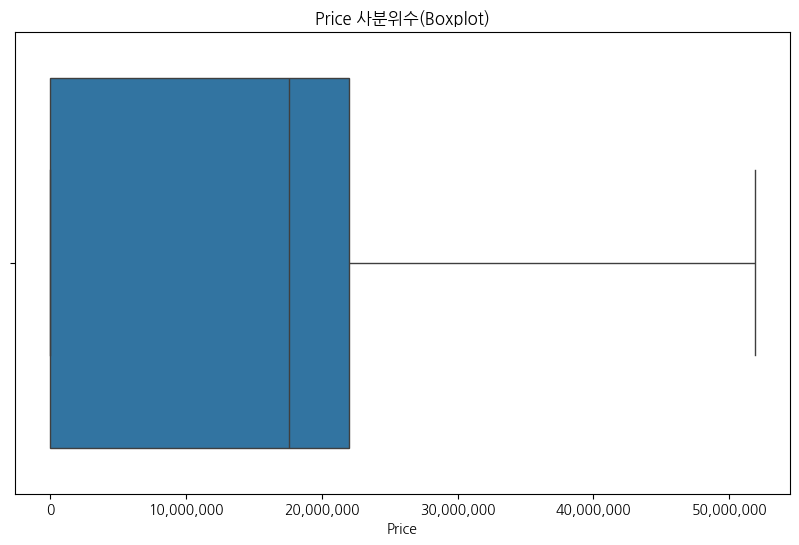

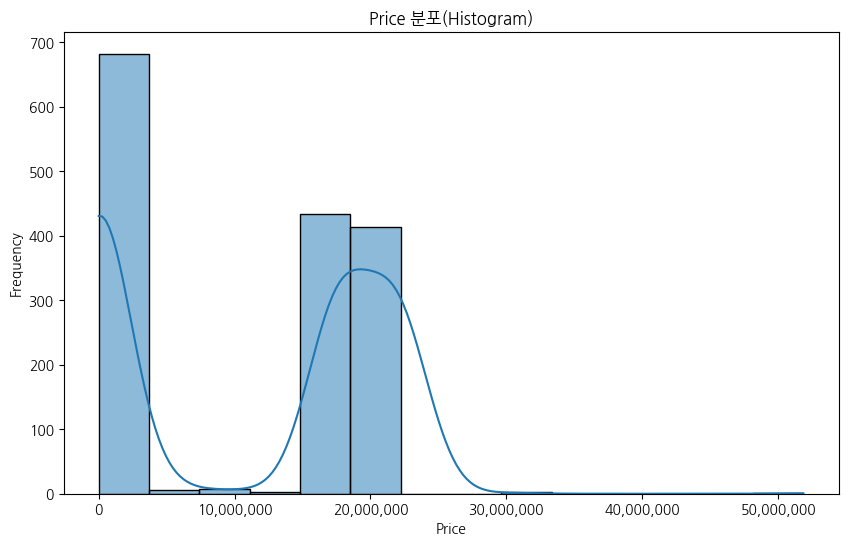

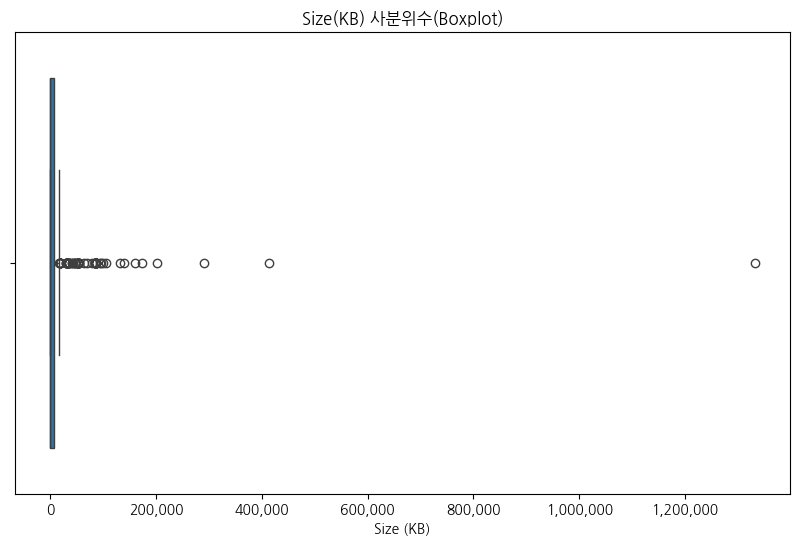

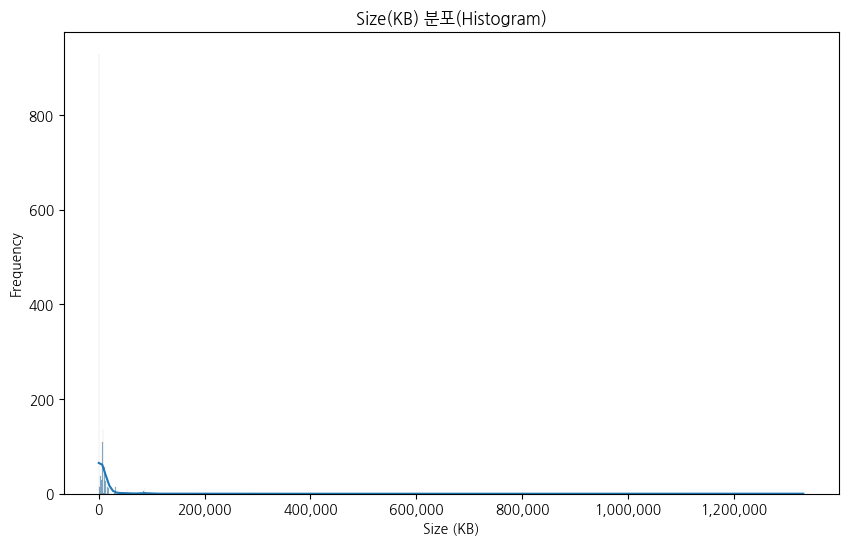

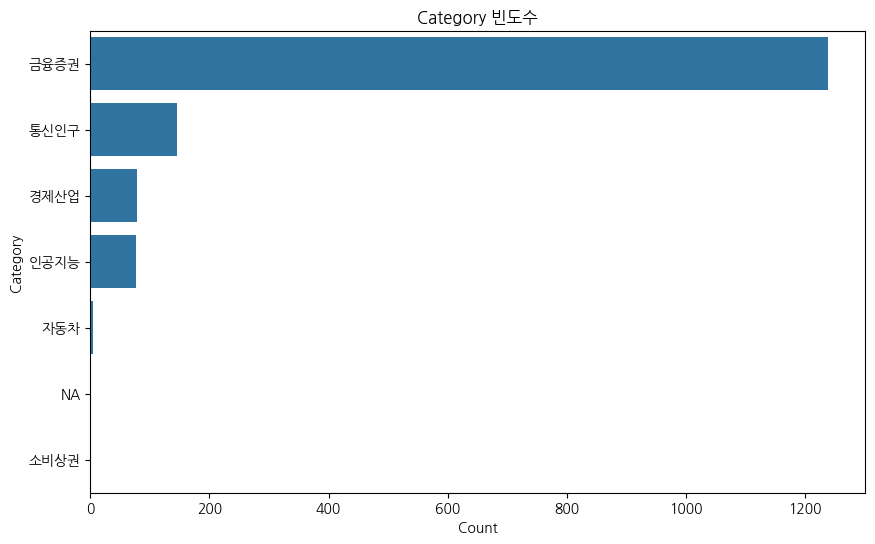

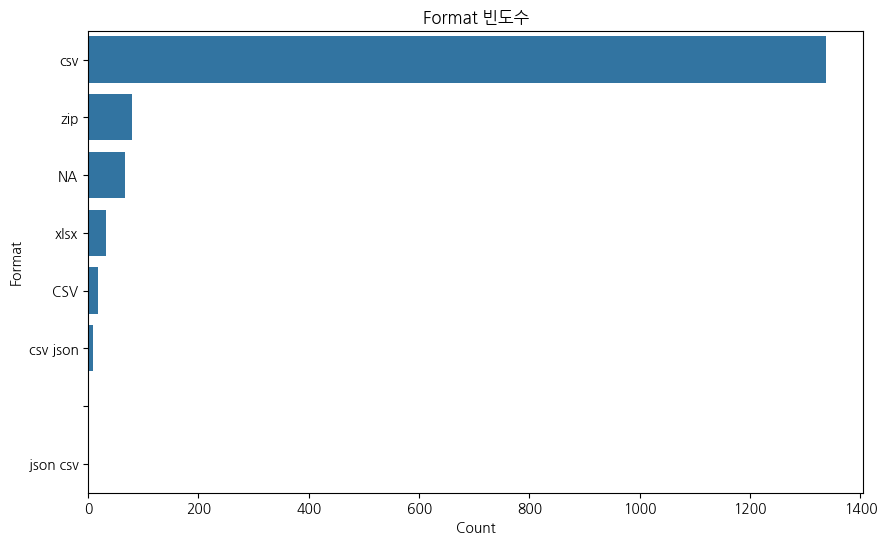


‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

# ‚úÖ price Ïà´Ïûê ÌëúÍ∏∞ ÏòµÏÖò ÏÑ§Ï†ï
import matplotlib.ticker as mticker

# ‚úÖ Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å ÎßàÏö¥Ìä∏
from google.colab import drive
drive.mount('/content/drive')

# ‚úÖ JSONL Î°úÎìú
file_path = '/content/drive/MyDrive/00. ÎåÄÌïôÏõê/data-price-20250629-v1.jsonl'

records = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        try:
            json_part = re.search(r'\{.*\}', line)
            if json_part:
                obj = json.loads(json_part.group())
                records.append(obj)
        except json.JSONDecodeError as e:
            print(f"‚ö†Ô∏è JSON ÎîîÏΩîÎìú ÏóêÎü¨: {e}")
            continue

df = pd.DataFrame(records)

# ‚úÖ 'price' Ïª¨Îüº Ïà´ÏûêÌòï Î≥ÄÌôò
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# ‚úÖ 'size' Ïª¨Îüº KB Îã®ÏúÑÎ°ú Î≥ÄÌôò (Í∞úÏÑ†Îêú Î≤ÑÏ†Ñ)
def convert_size(size_str):
    if isinstance(size_str, str):
        size_str = size_str.strip().upper().replace(",", "")
        # Ïà´Ïûê Ï∂îÏ∂ú
        match = re.search(r"[\d.]+", size_str)
        if not match:
            return None
        num = float(match.group())
        if "KB" in size_str:
            return num
        elif "MB" in size_str:
            return num * 1024
        elif "GB" in size_str:
            return num * 1024 * 1024
        elif "B" in size_str:
            return num / 1024
    return None

df['size_kb'] = df['size'].apply(convert_size)

# ‚úÖ Î≤îÏ£ºÌòï Ïª¨Îüº ÌÅ¥Î¶∞ÏóÖ
def clean_category(val):
    if isinstance(val, str):
        val = re.sub(r'[^Í∞Ä-Ìû£a-zA-Z0-9 ]', '', val)
        return val
    return val

df['category'] = df['category'].apply(clean_category)
df['format'] = df['format'].apply(clean_category)

# ‚úÖ 'price' ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title("Price ÏÇ¨Î∂ÑÏúÑÏàò(Boxplot)")
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Price")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['price'].dropna(), kde=True)
plt.title("Price Î∂ÑÌè¨(Histogram)")
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# ‚úÖ 'size_kb' ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['size_kb'])
plt.title("Size(KB) ÏÇ¨Î∂ÑÏúÑÏàò(Boxplot)")
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Size (KB)")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['size_kb'].dropna(), kde=True)
plt.title("Size(KB) Î∂ÑÌè¨(Histogram)")
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel("Size (KB)")
plt.ylabel("Frequency")
plt.show()

# ‚úÖ 'category' ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
order = df['category'].value_counts().index
sns.countplot(y='category', data=df, order=order)
plt.title("Category ÎπàÎèÑÏàò")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# ‚úÖ 'format' ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
order = df['format'].value_counts().index
sns.countplot(y='format', data=df, order=order)
plt.title("Format ÎπàÎèÑÏàò")
plt.xlabel("Count")
plt.ylabel("Format")
plt.show()

print("\n‚úÖ ÏãúÍ∞ÅÌôî ÏôÑÎ£å!")
